In [1]:
!unzip movielens100k.zip


Archive:  movielens100k.zip
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                
  inflating: u.data                  
  inflating: links.csv               


**Importing all the libraraies or dependencies**

In [2]:

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import LSTM
from keras.layers import Flatten,Activation,Input,Embedding
 

Using TensorFlow backend.


reading the **ratings.csv and movies.csv**

After reading merging both the files

In [0]:
ratings=pd.read_csv(r'/content/ratings.csv')

coping all the merge data into df

In [0]:
df=ratings.copy()

In [150]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


printing all the unique users

In [151]:
df['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

printing the length of the number of users

In [152]:
len(df['userId'].unique())

671

printing all the unique movies

In [153]:
df['movieId'].unique()

array([  31, 1029, 1061, ...,  129, 4736, 6425])

printing length of the number of unique movies

In [154]:
len(df['movieId'].unique())

9066

In [174]:
df['userId'].isnull().sum()

0

In [175]:
df['rating'].isnull().sum()

0

In [176]:
df['movieId'].isnull().sum()

0

In [155]:
df['rating'].min() # minimum rating

0.5

In [156]:
df['rating'].max() # maximum rating

5.0

**Encoding the columns**

In [0]:
df.userId = df.userId.astype('category').cat.codes.values
df.movieId = df.movieId.astype('category').cat.codes.values

In [177]:
df['userId'].value_counts(ascending=True)

0        20
208      20
248      20
324      20
437      20
309      20
603      20
398      20
667      20
336      20
497      20
220      20
13       20
288      20
34       20
295      20
650      20
75       20
484      20
582      20
443      20
539      20
483      20
447      20
656      20
444      20
318      20
637      20
355      21
63       21
       ... 
528     604
357     617
653     626
118     641
305     645
474     655
261     676
101     678
231     682
460     696
517     707
456     713
22      726
387     792
471     830
211     876
212     910
579     922
508     923
293     947
29     1011
310    1019
379    1063
467    1291
451    1340
72     1610
14     1700
623    1735
563    1868
546    2391
Name: userId, Length: 671, dtype: int64

In [159]:
df['movieId'].unique()

array([  30,  833,  859, ...,  115, 3712, 4629])

In [0]:
# creating utility matrix.
index=list(df['userId'].unique())
columns=list(df['movieId'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df=pd.pivot_table(data=df,values='rating',index='userId',columns='movieId')
# Nan implies that user has not rated the corressponding movie.

In [179]:
util_df

movieId,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
util_df.fillna(0)

movieId,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**spliting the data into train and test**

In [0]:
users = df.userId.unique()
movies = df.movieId.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [182]:
df['userId'] = df['userId'].apply(lambda x: userid2idx[x])
df['movieId'] = df['movieId'].apply(lambda x: movieid2idx[x])
split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(80242, 4) (19762, 4)


In [0]:
n_latent_factors=50
n_movies=len(df['movieId'].unique())
n_users=len(df['userId'].unique())

In [184]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
movie_input=Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding=Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)

In [0]:
sim=dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)

**Creating Embedding Model**

Our model will have the following structure:

*  Input layer Dense layers with 128 unit
*  Activation = **relu**
*  Dropout of 0.4
*  normalization = batch-Normalization

================================================


*  Input layer Dense layers with 128 unit
*  Activation = **relu**
*  Dropout of 0.4
*  normalization = batch-Normalization

================================================

*  Input layer Dense layers with 1 unit
*  Activation = **relu**


In [193]:
from keras.layers import Input, Embedding, Flatten, Dot, Dense,LSTM
from keras.models import Model

nn_inp=Dense(128,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
nn_inp=BatchNormalization()(nn_inp)

nn_inp=Dense(128,activation='relu')(nn_inp)
nn_inp=Dropout(0.4)(nn_inp)
nn_inp=BatchNormalization()(nn_inp)

nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, movie_input],nn_inp)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Movie-Input (InputLayer)        (None, 1)            0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 5)         45335       Movie-Input[0][0]                
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         3360        User-Input[0][0]                 
__________________________________________________________________________________________________
Flatten-Mo


The problem is really  on recommending movie to a paticualar user and as such is defined as optimizing the log loss (mean_squared_error), here using the ADAM optimization algorithm for speed

In [0]:
nn_model.compile('adam', 'mean_squared_error')

Training the model
Now that we have created our model we are ready to train it. Because we have two input layers (one for the books and one for the users), we need to specify an array of training data as our x data.

We can now fit our model to the data. Here we use a modest number of 30 epochs and a large batch size of 64 patterns.

In [190]:
batch_size = 64
epochs = 30

History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)
model.save('movie_recommendation.h5')

Train on 80242 samples, validate on 19762 samples
Epoch 1/30
80242/80242 [==============================] - 10s 120us/step - loss: 1.6748 - val_loss: 1.1012
Epoch 2/30
80242/80242 [==============================] - 8s 100us/step - loss: 1.1259 - val_loss: 1.1053
Epoch 3/30
80242/80242 [==============================] - 8s 101us/step - loss: 1.1276 - val_loss: 1.1010
Epoch 4/30
80242/80242 [==============================] - 8s 100us/step - loss: 1.1288 - val_loss: 1.1045
Epoch 5/30
80242/80242 [==============================] - 9s 113us/step - loss: 1.1272 - val_loss: 1.1016
Epoch 6/30
80242/80242 [==============================] - 8s 104us/step - loss: 1.1295 - val_loss: 1.1063
Epoch 7/30
80242/80242 [==============================] - 8s 100us/step - loss: 1.1264 - val_loss: 1.1102
Epoch 8/30
80242/80242 [==============================] - 8s 99us/step - loss: 1.1273 - val_loss: 1.1005
Epoch 9/30
80242/80242 [==============================] - 8s 99us/step - loss: 1.0973 - val_loss: 1.09

**ploting the loss** 

xlabel = number of epochs
ylabel = training loss

Text(0, 0.5, 'training loss')

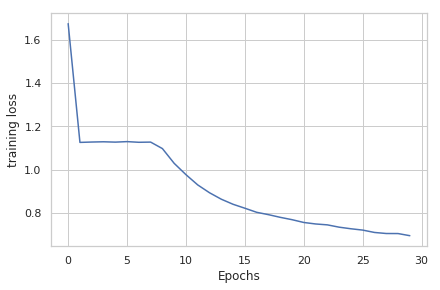

In [194]:
plt.plot(History.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('training loss')

**Making Recommendations**


Making recommendations using our trained model is simple. We only need to feed in a user and all books and then select the books which have the highest predicted ratings for that specific user.

The code below shows the process of making predictions for a specific user:

In [195]:
movie_data = np.array(list(set(df.movieId)))
movie_data[:5]

array([0, 1, 2, 3, 4])

predicting for 14th user

In [203]:
user = np.array([14 for i in range(len(movie_data))])
user[:5]

array([14, 14, 14, 14, 14])

In [201]:
predictions = model.predict([user, movie_data])
predictions = np.array([a[0] for a in predictions])
recommended_movie_ids = (-predictions).argsort()[:5]
print(recommended_movie_ids)
print(predictions[recommended_movie_ids])

[ 111 4127 7190 4448 2585]
[4.3494177 4.222208  4.1488457 4.131571  4.1214514]


In [198]:
movies = pd.read_csv(r'/content/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [202]:
print(movies[movies['movieId'].isin(recommended_movie_ids)])

      movieId                                              title  \
101       111                                 Taxi Driver (1976)   
2073     2585  Lovers of the Arctic Circle, The (Los Amantes ...   
3512     4448                                  Score, The (2001)   
5047     7190                                   Jane Eyre (1970)   

                    genres  
101   Crime|Drama|Thriller  
2073         Drama|Romance  
3512          Action|Drama  
5047                 Drama  
